INF8770 Technologies multimédias

Polytechnique Montréal

Exemple de l'application de la transformée en ondelettes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Lecture de l'image.

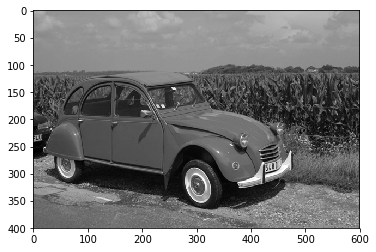

In [2]:
image = (cv2.imread('RGB.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.show()

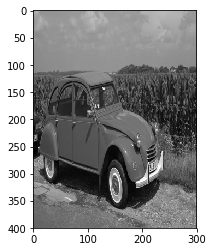

In [3]:
f1 = np.zeros((len(image),int(len(image[0])/2)))
for i in range(0,len(image)):
    k=0
    for j in range(0, len(image[0]),2):
        f1[i,k]=(image[i,j]+image[i,j+1])/2 
        k=k+1;
        
plt.imshow(f1, cmap = plt.get_cmap('gray'))
plt.show()

En X: Filtrage passe-haute. On extrait les hautes fréquences à l'aide des différences.

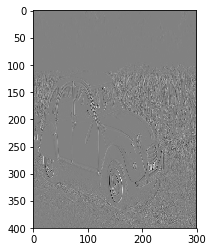

In [4]:
fh = (image[:,::2] - image[:,1::2])/2  #Avec indexation avancée plutôt qu'avec des for. Wow!!!!
        
plt.imshow(fh, cmap = plt.get_cmap('gray'))
plt.show()

On poursuit le traitement selon Y les images f1 et fh
On extrait 4 sous-bandes:

1: Basses fréquences en X et Y, image f11

2: Hautes fréquence en Y, basses en X, image f1h

3: Hautes fréquence en X, basses en Y, image fh1

4: Hautes en X et Y, image fhh

1: Basses fréquences en X et Y, image f11

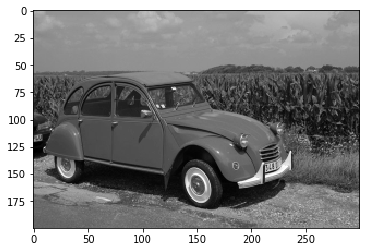

In [5]:
f11 = (f1[::2,:] + f1[1::2,:])/2
        
plt.imshow(f11, cmap = plt.get_cmap('gray'))
plt.show()

2: Hautes fréquence en Y, basses en X, image f1h

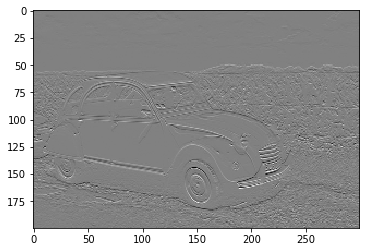

In [6]:
f1h = np.zeros((int(len(image)/2),int(len(image[0])/2)))
k=0
for i in range(0,len(f1),2):    
    for j in range(0, len(f1[0])):
        f1h[k,j]=(f1[i,j]-f1[i+1,j])/2
    k=k+1;
        
plt.imshow(f1h, cmap = plt.get_cmap('gray'))
plt.show()

3: Hautes fréquence en X, basses en Y, image fh1

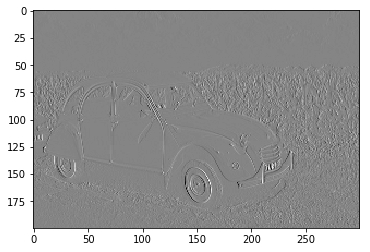

In [7]:
fh1 = np.zeros((int(len(image)/2),int(len(image[0])/2)))
k=0
for i in range(0,len(fh),2):    
    for j in range(0, len(fh[0])):
        fh1[k,j]=(fh[i,j]+fh[i+1,j])/2
    k=k+1;
        
plt.imshow(fh1, cmap = plt.get_cmap('gray'))
plt.show()

4: Hautes en X et Y, image fhh

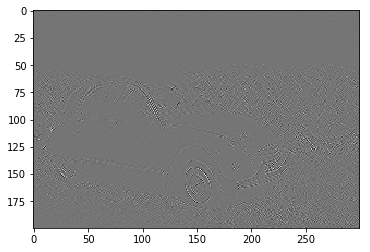

In [8]:
fhh = np.zeros((int(len(image)/2),int(len(image[0])/2)))
k=0
for i in range(0,len(fh),2):    
    for j in range(0, len(fh[0])):
        fhh[k,j]=(fh[i,j]-fh[i+1,j])/2
    k=k+1;
        
plt.imshow(fhh, cmap = plt.get_cmap('gray'))
plt.show()

Transformée inverse. Exemple obtenir l'image originale à partir de f1 et fh.

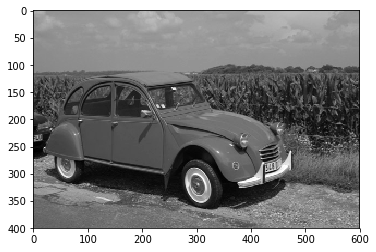

In [9]:
original = np.zeros((len(image),len(image[0])))
#copie des pixels de f1. Met les mêmes valeurs de f1 pour i et i+1
for i in range(0,len(f1)):    
    for j in range(0, len(f1[0])):
        original[i,2*j]=f1[i,j]
        original[i,2*j+1]=f1[i,j]
    
        
plt.imshow(original, cmap = plt.get_cmap('gray'))
plt.show()

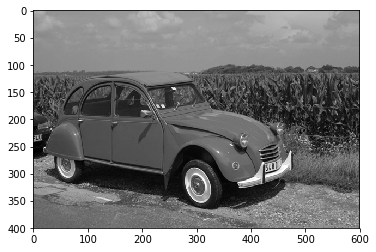

In [10]:
#Ajout des hautes fréquences
for i in range(0,len(fh)):    
    for j in range(0, len(fh[0])):
        original[i,2*j] += fh[i,j]
        original[i,2*j+1] -= fh[i,j]
    
        
plt.imshow(original, cmap = plt.get_cmap('gray'))
plt.show()

Les images sont identiques.

In [11]:
np.max(image - original)

0.0